In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_excel(r"C:\Users\isaac\Documentos\Eco\6to\C.Econ\pwt91.xlsx",sheet_name="Data")

In [3]:
data=data.loc[data["year"]>=1980]

In [4]:
df=data[(data["country"]=="Chile")|(data["country"]=="Argentina")|(data["country"]=="Mexico")|(data['country']=='Bolivia (Plurinational State of)')|(data['country']=='Brazil')|(data['country']=='Colombia')|(data['country']=='Costa Rica')|(data['country']=='Cuba')|(data['country']=='Ecuador')|(data['country']=='El Salvador')|(data['country']=='Guatemala')|(data['country']=='Haiti')|(data['country']=='Honduras')|(data['country']=='Nicaragua')|(data['country']=='Panama')|(data['country']=='Paraguay')|(data['country']=='Peru')|(data['country']=='Uruguay')|(data['country']=='Dominican Republic')|(data['country']=='Venezuela (Bolivarian Republic of)')]

In [5]:
df.country.value_counts()

Panama                                38
Venezuela (Bolivarian Republic of)    38
Nicaragua                             38
Chile                                 38
Peru                                  38
Dominican Republic                    38
Uruguay                               38
Brazil                                38
Costa Rica                            38
Argentina                             38
Colombia                              38
Paraguay                              38
Mexico                                38
Haiti                                 38
El Salvador                           38
Ecuador                               38
Honduras                              38
Bolivia (Plurinational State of)      38
Guatemala                             38
Name: country, dtype: int64

In [6]:
df = df[["country", "year","labsh","pop","rgdpe","cn","hc","ctfp"]]

In [7]:
df["H/N"]=df["hc"]/df["pop"]
df["GDPPPC"] = df["rgdpe"]/df["pop"]
df["KPC"]=df["cn"]/df["pop"]
df[['GDPPC_Growth','H/N Growth','KPC Growth','A Growth']]=df.sort_values(['year']).groupby('country')[['GDPPPC','H/N','KPC','ctfp']].pct_change()

In [8]:
asdas=df.groupby("country").mean()
media_labsh=asdas["labsh"]
media_gy=asdas["GDPPC_Growth"]
media_ga=asdas["A Growth"]
media_gk=asdas["KPC Growth"]
media_gdp=asdas["GDPPPC"]


In [9]:
pct_ga= 100*(media_ga/media_gy)
labsh_cal=(1-media_labsh)*media_gk
pct_gk=(100*labsh_cal)/media_gy
ni_idea=media_gy-media_ga-labsh_cal
pct_gh=100*ni_idea/media_gy

In [10]:
media_gy*100

country
Argentina                             4.130892
Bolivia (Plurinational State of)      3.024668
Brazil                                2.758526
Chile                                 3.522048
Colombia                              1.753132
Costa Rica                            2.107918
Dominican Republic                    3.328850
Ecuador                               1.029237
El Salvador                           2.605510
Guatemala                             1.890844
Haiti                                 0.197598
Honduras                              1.306567
Mexico                                1.192349
Nicaragua                             0.450723
Panama                                3.624206
Paraguay                              2.631681
Peru                                  3.142488
Uruguay                               2.302616
Venezuela (Bolivarian Republic of)    0.074854
Name: GDPPC_Growth, dtype: float64

In [11]:
pct_ga

country
Argentina                               12.505671
Bolivia (Plurinational State of)        -5.918020
Brazil                                 -38.077873
Chile                                    0.216375
Colombia                               -60.025968
Costa Rica                             -29.610718
Dominican Republic                       6.332427
Ecuador                               -201.468027
El Salvador                                   NaN
Guatemala                              -43.970395
Haiti                                         NaN
Honduras                              -124.146142
Mexico                                -121.570516
Nicaragua                             -478.992451
Panama                                  -6.691059
Paraguay                               -58.309645
Peru                                   -17.224511
Uruguay                                -20.263279
Venezuela (Bolivarian Republic of)   -2707.871178
dtype: float64

In [12]:
pct_gk

country
Argentina                               85.246243
Bolivia (Plurinational State of)        65.186552
Brazil                                  93.281885
Chile                                   81.407371
Colombia                                91.288370
Costa Rica                              78.049668
Dominican Republic                      72.126585
Ecuador                                185.683343
El Salvador                                   NaN
Guatemala                              132.588362
Haiti                                         NaN
Honduras                               119.681129
Mexico                                 183.669594
Nicaragua                              138.054275
Panama                                  91.948292
Paraguay                               101.106630
Peru                                   102.501230
Uruguay                                 81.555258
Venezuela (Bolivarian Republic of)    2133.899478
dtype: float64

In [13]:
pct_gh

country
Argentina                               2.248086
Bolivia (Plurinational State of)       40.731467
Brazil                                 44.795988
Chile                                  18.376254
Colombia                               68.737598
Costa Rica                             51.561050
Dominican Republic                     21.540988
Ecuador                               115.784684
El Salvador                                  NaN
Guatemala                              11.382033
Haiti                                        NaN
Honduras                              104.465013
Mexico                                 37.900922
Nicaragua                             440.938176
Panama                                 14.742768
Paraguay                               57.203014
Peru                                   14.723281
Uruguay                                38.708021
Venezuela (Bolivarian Republic of)    673.971700
dtype: float64

In [14]:
media_latam_ga = pct_ga.mean()
media_latam_gk = pct_gk.mean()
media_latam_gh = pct_gh.mean()

In [15]:
print(media_latam_ga,media_latam_gh,media_latam_gk)

-229.12266510996173 103.40064948534979 225.72201562461194


In [16]:
media_gy.mean()*100

2.161826576800111

In [17]:
paises = df.country.unique()

In [18]:
tabla = pd.DataFrame({"pais":paises,
                        "media gy":media_gy*100,
                      "pct ga":pct_ga,
                      "pct gk":pct_gk,
                      "pct gh":pct_gh}
                                )

In [19]:
tabla.to_excel("Proyecto_Latam.xls",index=False)

In [20]:
paises =df["country"].unique()

In [21]:
paises

array(['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile',
       'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador',
       'Guatemala', 'Honduras', 'Haiti', 'Mexico', 'Nicaragua', 'Panama',
       'Peru', 'Paraguay', 'El Salvador', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'], dtype=object)

In [22]:
gdp_mexico = df.loc[df["country"]=='Mexico']["GDPPPC"]
gdp_chile = df.loc[df["country"]=='Chile']["GDPPPC"]
gdp_brazil = df.loc[df["country"]=='Brazil']["GDPPPC"]
gdp_uruguay = df.loc[df["country"]=='Uruguay']["GDPPPC"]
gdp_argentina = df.loc[df["country"]=='Argentina']["GDPPPC"] 
gdp_bolivia = df.loc[df["country"]=='Bolivia (Plurinational State of)']["GDPPPC"]
gdp_colombia = df.loc[df["country"]=='Colombia']["GDPPPC"]
gdp_cr = df.loc[df["country"]=='Costa Rica']["GDPPPC"]
gdp_dr = df.loc[df["country"]=='Dominican Republic']["GDPPPC"]
gdp_ecu = df.loc[df["country"]=='Ecuador']["GDPPPC"]
gdp_gua = df.loc[df["country"]=='Guatemala']["GDPPPC"]
gdp_hon = df.loc[df["country"]=='Honduras']["GDPPPC"]
gdp_hai = df.loc[df["country"]=='Haiti']["GDPPPC"]
gdp_nic = df.loc[df["country"]=='Nicaragua']["GDPPPC"]
gdp_pan = df.loc[df["country"]=='Panama']["GDPPPC"]
gdp_per = df.loc[df["country"]=='Peru']["GDPPPC"]
gdp_par = df.loc[df["country"]=='Paraguay']["GDPPPC"]
gdp_sal = df.loc[df["country"]=='El Salvador']["GDPPPC"]
gdp_ven = df.loc[df["country"]=='Venezuela (Bolivarian Republic of)']["GDPPPC"]
years = df["year"].unique()
y_mean = [np.mean(df["GDPPPC"])]*len(years)

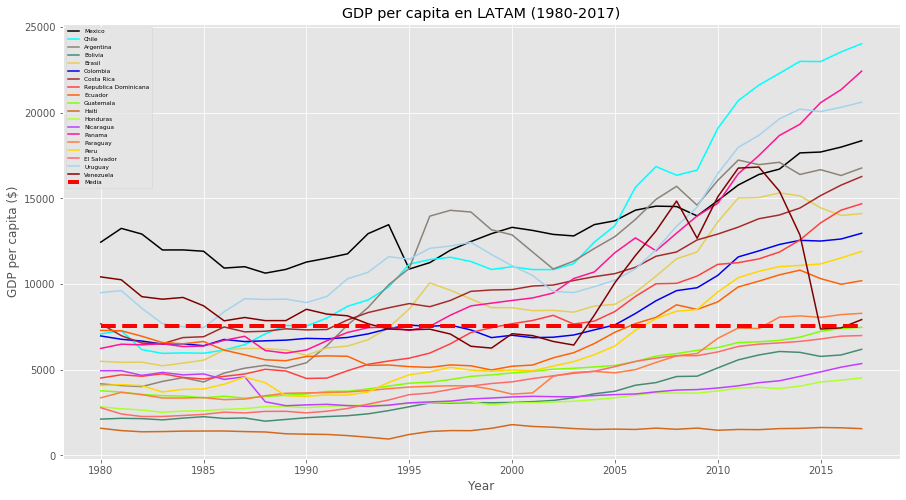

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))


plt.plot(years, gdp_mexico,label='Mexico',c="#000000")
plt.plot(years, gdp_chile, label='Chile',c="#00FFFF")
plt.plot(years, gdp_argentina, label='Argentina',c="#8B8378")
plt.plot(years, gdp_bolivia, label='Bolivia',c="#458B74")
plt.plot(years, gdp_brazil, label='Brasil',c="#E3CF57")
plt.plot(years, gdp_colombia, label='Colombia',c="#0000EE")
plt.plot(years, gdp_cr, label='Costa Rica',c="#A52A2A")
plt.plot(years, gdp_dr, label='Republica Dominicana',c="#FF4040")
plt.plot(years, gdp_ecu, label='Ecuador',c="#FF6103")
plt.plot(years, gdp_gua, label='Guatemala',c="#7FFF00")
plt.plot(years, gdp_hai, label='Haiti',c="#D2691E")
plt.plot(years, gdp_hon, label='Honduras',c="#ADFF2F")
plt.plot(years, gdp_nic, label='Nicaragua',c="#BF3EFF")
plt.plot(years, gdp_pan, label='Panama',c="#FF1493")
plt.plot(years, gdp_par, label='Paraguay',c="#FF7D40")
plt.plot(years, gdp_per, label='Peru',c="#FFD700")
plt.plot(years, gdp_sal, label='El Salvador',c="#FF6A6A")
plt.plot(years, gdp_uruguay, label='Uruguay',c="#A4D3EE")
plt.plot(years, gdp_ven, label='Venezuela',c="#800000")
plt.plot(years, y_mean, label='Media',c="r",linewidth=4,linestyle="--")

plt.legend(loc='upper left',fontsize="xx-small")
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')
plt.title("GDP per capita en LATAM (1980-2017)")
plt.savefig("gdp_latam.jpeg",dpi=96)